<a href="https://colab.research.google.com/github/kecoaxx/david-s_portfolio/blob/master/UAS_Kelas_C_Kelompok_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UAS Kelas C Kelompok 4
- Aniar Permadani 2105541080
- Adianto Sakke Karoma 2105541081
- I Putu Krisna Angga Winata 2105541083
- David Samuel Sitorus 2105541084

In [ ]:
#Library
import pandas as pd
from pandas import Series
import numpy as np
import sys
from collections import Counter
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import itertools


#1. Torronto Bikeshare Data

In [ ]:
#Source data Bikeshare
df_BikeshareQ1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/raw/bikeshare-ridership-2017/2017 Data/Bikeshare Ridership (2017 Q1).csv')
df_BikeshareQ2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/raw/bikeshare-ridership-2017/2017 Data/Bikeshare Ridership (2017 Q2).csv')
df_BikeshareQ3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/raw/bikeshare-ridership-2017/2017 Data/Bikeshare Ridership (2017 Q3).csv')
df_BikeshareQ4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/raw/bikeshare-ridership-2017/2017 Data/Bikeshare Ridership (2017 Q4).csv')
df_BikeshareQ1_18 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/raw/bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q1 2018.csv')
df_BikeshareQ2_18 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/raw/bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q2 2018.csv')
df_BikeshareQ3_18 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/raw/bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q3 2018.csv')
df_BikeshareQ4_18 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/raw/bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q4 2018.csv')

In [ ]:
#data Bikeshare dijadikan satu

df_Bikeshare = pd.merge(df_BikeshareQ1, df_BikeshareQ2, on=list(df_BikeshareQ1.columns), how='outer')
df_Bikeshare = pd.merge(df_Bikeshare, df_BikeshareQ3, on=list(df_BikeshareQ3.columns), how='outer')
df_Bikeshare = pd.merge(df_Bikeshare, df_BikeshareQ4, on=list(df_BikeshareQ4.columns), how='outer')
df_Bikeshare = pd.merge(df_Bikeshare, df_BikeshareQ1_18, on=list(df_BikeshareQ1_18.columns), how='outer')
df_Bikeshare = pd.merge(df_Bikeshare, df_BikeshareQ2_18, on=list(df_BikeshareQ2_18.columns), how='outer')
df_Bikeshare = pd.merge(df_Bikeshare, df_BikeshareQ3_18, on=list(df_BikeshareQ3_18.columns), how='outer')
df_Bikeshare = pd.merge(df_Bikeshare, df_BikeshareQ4_18, on=list(df_BikeshareQ4_18.columns), how='outer')

In [ ]:
#sortir data menurut urutan data, memastikan data telah menyatu atau tidak
df_Bikeshare.sort_index()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
0,712382,1/1/2017 0:00,1/1/2017 0:03,223,7051.0,Wellesley St E / Yonge St Green P,7089.0,Church St / Wood St,Member
1,712383,1/1/2017 0:00,1/1/2017 0:05,279,7143.0,Kendal Ave / Bernard Ave,7154.0,Bathurst Subway Station,Member
2,712384,1/1/2017 0:05,1/1/2017 0:29,1394,7113.0,Parliament St / Aberdeen Ave,7199.0,College St W / Markham St,Member
3,712385,1/1/2017 0:07,1/1/2017 0:21,826,7077.0,College Park South,7010.0,King St W / Spadina Ave,Member
4,712386,1/1/2017 0:08,1/1/2017 0:12,279,7079.0,McGill St / Church St,7047.0,University Ave / Gerrard St W,Member
...,...,...,...,...,...,...,...,...,...
3415319,4581273,12/31/2018 23:43,12/31/2018 23:49,379,7088.0,Danforth Ave / Coxwell Ave,7091.0,Donlands Station,Annual Member
3415320,4581274,12/31/2018 23:45,12/31/2018 23:50,306,7030.0,Bay St / Wellesley St W,7031.0,Jarvis St / Isabella St,Annual Member
3415321,4581275,12/31/2018 23:49,12/31/2018 23:55,340,7020.0,Phoebe St / Spadina Ave,7000.0,Fort York Blvd / Capreol Ct,Annual Member
3415322,4581276,12/31/2018 23:52,1/1/2019 0:17,1466,7014.0,Sherbourne St / Carlton St (Allan Gardens),7269.0,Toronto Eaton Centre (Yonge St),Annual Member


1a. Cari tahu berapa persentase sepeda kembali ke lokasi awalnya? 

In [ ]:
#Mencari persentase dengan cara membagi semua sepeda yang kembali ke tempat asal semula dengan total pemakaian sepeda menggunakan trip_id lalu dikalikan 100 dan hasilnya dibulatkan menjadi 3 angka dibelakang koma.
BikesharePercent1 = round(((len(df_Bikeshare.query('from_station_name == to_station_name')))/(len(df_Bikeshare['trip_id'].dropna())))*100,3)
print('Persentase sepeda yang kembali ke lokasi awalnya adalah =',BikesharePercent1, '%')

Persentase sepeda yang kembali ke lokasi awalnya adalah = 3.777 %


1b.  Berapa banyak perjalanan bikeshare yang biasanya kunjungi lebih dari sekadar titik awal/akhir, tetapi mengunjungi beberapa titik lain sebelumnya penghujung hari? 

In [ ]:
# filter data berbasis date range
start_date = '1/1/2017 0:00'
end_date = '1/1/2019 23:59'
df_filtered = df_Bikeshare[(df_Bikeshare['trip_start_time'] >= start_date) & (df_Bikeshare['trip_stop_time'] <= end_date)]

# hitung total trip yang terjadi lebih dari satu titik
num_trips = df_filtered.groupby('trip_id').filter(lambda x: x['from_station_id'].nunique() > 1).shape[0]
print('Banyak perjalanan bikeshare yang biasanya kunjungi lebih dari sekadar titik awal/akhir, tetapi mengunjungi beberapa titik lain sebelumnya penghujung hari =',num_trips)

Banyak perjalanan bikeshare yang biasanya kunjungi lebih dari sekadar titik awal/akhir, tetapi mengunjungi beberapa titik lain sebelumnya penghujung hari = 0


#2.  McDonald Nutrition Facts

In [ ]:
#Source data nutrisi McDonalds
df_mcd = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/raw/McD.csv")
df_mcd.head()

In [ ]:
Item = df_mcd['Item']

#Karena pertanyaan 2b menanyakan nutrisi per hari, maka kita ambil semua kolom yang bersifat persentase 
df_mcdDaily = df_mcd[['Total Fat (% Daily Value)',
        'Saturated Fat (% Daily Value)',
        'Cholesterol (% Daily Value)',
        'Sodium (% Daily Value)',
        'Carbohydrates (% Daily Value)',
        'Dietary Fiber (% Daily Value)',
        'Vitamin A (% Daily Value)',
        'Vitamin C (% Daily Value)',
        'Calcium (% Daily Value)',
        'Iron (% Daily Value)']]

2a. Berapa banyak kalori yang dihasilkan oleh nilai kalori rata‐rata makanan McDonald?

In [ ]:
#mencari rata2 kalori menggunakan df.mean
McDonaldMean = df_mcd["Calories"].mean()
print('Rata-rata dari kalori dalam menu McDonalds adalah =',McDonaldMean)

2b. Berapa jumlah yang paling sedikit item yang dapat dipesan dari menu untuk memenuhi satu hari kebutuhan nutrisi?

In [ ]:
#Semua kolom persentase nilai harian

biarGaribet = ['Total Fat (% Daily Value)',
              'Saturated Fat (% Daily Value)',
              'Cholesterol (% Daily Value)',
              'Sodium (% Daily Value)',
              'Carbohydrates (% Daily Value)',
              'Dietary Fiber (% Daily Value)',
              'Vitamin A (% Daily Value)',
              'Vitamin C (% Daily Value)',
              'Calcium (% Daily Value)',
              'Iron (% Daily Value)']

In [ ]:
#Filter %daily value yang lebih dari 100 dan yang bernutrisi 0 dan menambahkan kolom nama item.
df_mcdDailyIsin = df_mcdDaily[(df_mcdDaily[biarGaribet] <= 100)&(df_mcdDaily[biarGaribet] != 0)]  
df_mcdFix = df_mcdDailyIsin[biarGaribet].sort_values(by=biarGaribet, ascending=False).dropna(subset=biarGaribet)
df_mcdFix.insert(0,'Item',Item)

#total dari 10 item teratas
df_mcdFix[biarGaribet].iloc[range(1,10)].dropna().sum()

Dibutuhkan minimal 10 item yang dapat memenuhi kebutuhan sehari.

In [ ]:
#10 item makanan yang ditotalkan
mcdNamaItemHasil = df_mcdFix['Item'].iloc[range(1,10)]

for col in mcdNamaItemHasil:
  print(col)

#3. Starbucks Location

In [ ]:
#Source data lokasi Starbucks
df_Starbucks = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/raw/starbucksLocation.csv')
df_Starbucks.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


3a. Kota atau negara mana yang memiliki jumlah kedai Starbucks tertinggi per kapita?  

In [ ]:
#mencari modus
modeStarbucksCountry = df_Starbucks['Country'].mode()[0]
modeStarbucksCity = df_Starbucks['City'].mode()[0]
print('Lokasi yang memiliki jumlah kedai Starbucks tertinggi per kapita adalah negara:',
      modeStarbucksCountry,
      'dan kota:',
      modeStarbucksCity)

Lokasi yang memiliki jumlah kedai Starbucks tertinggi per kapita adalah negara: US dan kota: 上海市


In [ ]:
print('Total Starbucks di negara ', modeStarbucksCountry,
      ' adalah: ',(sum(df_Starbucks['Country'] == modeStarbucksCountry)),
      '\nTotal Starbucks di kota ',
      modeStarbucksCity,' adalah: ',
      (sum(df_Starbucks['City'] == modeStarbucksCity)))

Total Starbucks di negara  US  adalah:  13608 
Total Starbucks di kota  上海市  adalah:  542


3b. Apa lokasi di Bumi yang paling jauh dari Starbucks? 

In [ ]:
#menggunakan cara haversine untuk menghitung Longitude dan Latitude
def haversine_distance(lat1, long1, lat2, long2):
  R = 6371  # radius of Earth in kilometers
  phi1 = np.radians(lat1)
  phi2 = np.radians(lat2)
  delta_phi = np.radians(lat2 - lat1)
  delta_lambda = np.radians(long2 - long1)
  a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
  return R * c

In [ ]:
# Calculate the mean of the latitude and longitude columns
mean_lat = df_Starbucks['Latitude'].mean()
mean_long = df_Starbucks['Longitude'].mean()

# Find the location farthest from any Starbucks by calculating the distance from each location to the mean
def find_farthest_location(row):
  lat = row['Latitude']
  long = row['Longitude']
  distance = haversine_distance(lat, long, mean_lat, mean_long)
  return distance

# Use the apply function to find the farthest location
farthest_location = df_Starbucks.apply(find_farthest_location, axis=1)

# Return the location with the farthest distance from the mean
farthest_location_row = df_Starbucks[farthest_location == farthest_location.max()]
farthest_location_row_df = pd.DataFrame(farthest_location_row)
# Display the result
farthest_location_row_df.head(1)

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
274,Starbucks,25277-240391,Haymarket,Licensed,"730-742 George Street, Shop G1, L1 16 & 17",Sydney,NSW,AU,2000,NaN,GMT+10:00 Australia/Sydney,151.21,-33.88


jadi lokasi terjauh di dunia yang tidak memiliki starbucks ada di Haymarket, Australia dengan koordinat \
latitude = -33.88	\
longitude = 151.21

#4. Fuel Consumption CO2

In [ ]:
#Source data penggunaan bahan bakar CO2
df_Fuel = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/raw/FuelConsumptionCo2.csv')
df_Fuel.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


4a. Buat model Regresi variabel tunggal untuk prediksi Emisi Karbon

In [ ]:
#sort data sesuai dengan 'FUELCONSUMPTION_COMB','CO2EMISSIONS' 
df_Fuel.sort_values(['FUELCONSUMPTION_COMB','CO2EMISSIONS'], ascending = False)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
228,2014,CHEVROLET,EXPRESS 3500 PASSENGER,VAN - PASSENGER,6.0,8,A6,E,30.2,20.5,25.8,11,413
452,2014,GMC,SAVANA 3500 PASSENGER,VAN - PASSENGER,6.0,8,A6,E,30.2,20.5,25.8,11,413
225,2014,CHEVROLET,EXPRESS 2500 PASSENGER,VAN - PASSENGER,6.0,8,A6,E,30.0,20.4,25.7,11,411
449,2014,GMC,SAVANA 2500 PASSENGER,VAN - PASSENGER,6.0,8,A6,E,30.0,20.4,25.7,11,411
351,2014,FORD,E350 WAGON FFV,VAN - PASSENGER,5.4,8,A4,E,26.7,20.5,23.9,12,382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,2014,TOYOTA,PRIUS v,STATION WAGON - MID-SIZE,1.8,4,AV,X,5.3,5.8,5.5,51,126
1042,2014,VOLKSWAGEN,JETTA TURBO HYBRID,COMPACT,1.4,4,AM7,Z,5.6,5.2,5.4,52,124
487,2014,HONDA,ACCORD HYBRID,MID-SIZE,2.0,4,AV,X,4.7,4.9,4.8,59,110
987,2014,TOYOTA,PRIUS,MID-SIZE,1.8,4,AV,X,4.7,4.9,4.8,59,110


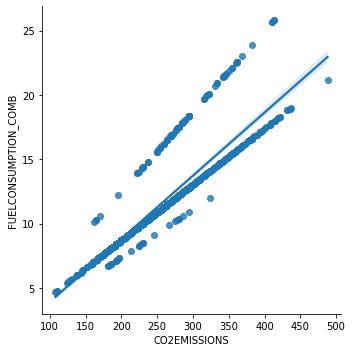

In [ ]:
#linear regresi dengan x sebagai CO2 EMMISIONS dan y sebagai FUEL CONSUMPTION COMBINED
sns.lmplot(data=df_Fuel,x='CO2EMISSIONS',y='FUELCONSUMPTION_COMB')

4b. Buat model Regresi variabel jamak untuk prediksi Emisi Karbon 

In [ ]:
#mencaritahu apakah kolom FUELTYPE dapat digunakan menjadi variabel independen
fuelDropDup = df_Fuel['FUELTYPE'].drop_duplicates()

for (val) in fuelDropDup:
  print(val)

Z
D
X
E


Dengan ini kita dapat menggunakan FUELTYPE sebagai variable independen

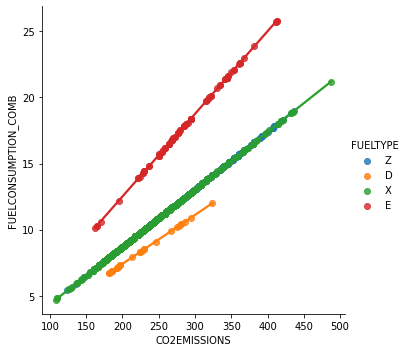

In [ ]:
sns.lmplot(data=df_Fuel,x='CO2EMISSIONS',
           y='FUELCONSUMPTION_COMB', 
           hue='FUELTYPE')

Kita bisa lihat bahwa fuel type Z dan X berada di garis yang sama, fuel type D membuat lebih banyak CO2 emission walaupun mempunyai sedikit fuel consumption, dan fuel type E membuat lebih sedikit CO2 emission dan mempunyai banyak fuel consumption